- 모델 내부적으로 출력 결과를 어떻게 정의하는지 확인

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


- 출력값이 (batch_size, output_dim) 크기의 2D텐서일때

In [2]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10))) # RNN층 추가
# model.add(SimpleRNN(3, input_length = 2, input_dim=10))와 동일
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
- output_dim은 hidden_size의 값인 3
- 

- batch_size를 미리 정의

In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


- batch_size를 8로 기재하자, 출력의 크기가 (8,3)이 됨

- 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴

In [4]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


- return_sequences의 매개변수에 True를 기재하여 3D 텐서를 리턴

## RNN을 이용한 언어 모델링

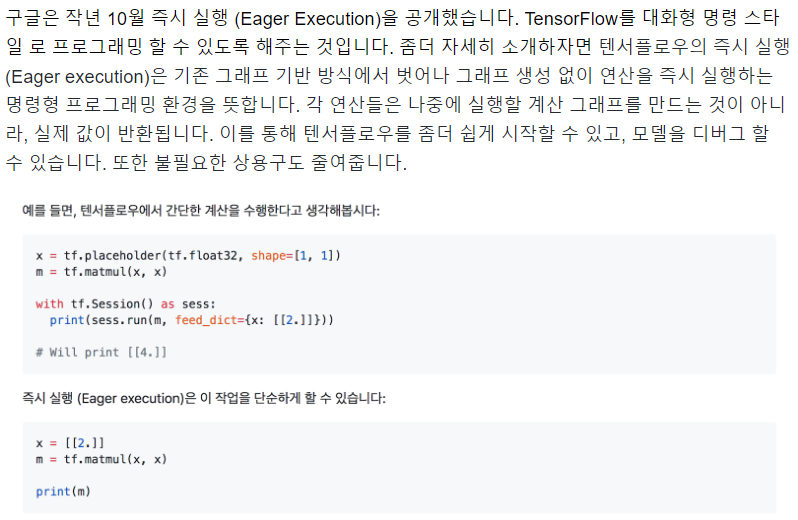

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
tf.enable_eager_execution()

In [5]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(np.shape(train_X))

(1, 4, 5)


In [6]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)

hidden_states, last_states=rnn(train_X)

print('train_X : {}, shape:{}'.format(train_X, train_X.shape))
print('hidden states : {}, shape : {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape : {}'.format(last_states, last_states.shape))

train_X : [[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]], shape:(1, 4, 5)
hidden states : [[[ 0.12424069  0.9216088   0.41549978]
  [ 0.38168833 -0.34921035  0.922096  ]
  [ 0.99402714  0.4074136   0.96870387]
  [-0.6702777   0.75570273  0.99436855]]], shape : (1, 4, 3)
last hidden state : [[-0.6702777   0.75570273  0.99436855]], shape : (1, 3)


In [1]:
text = '나랑 점심 먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지'

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [3]:
encoded

[2, 1, 3, 4, 5, 6, 1, 7, 8]

In [4]:
t

In [5]:
vocab_size = len(t.word_index)+1
print('단어 집합의 크기 : %d'% vocab_size)

단어 집합의 크기 : 9


In [6]:
print(t.word_index)

{'점심': 1, '나랑': 2, '먹으러': 3, '갈래': 4, '메뉴는': 5, '햄버거': 6, '메뉴': 7, '좋지': 8}


In [7]:
sequences = list()
for c in range(1, len(encoded)):
    sequence = encoded[c-1:c+1]
    sequences.append(sequence)
print("단어 묶음의 개수 : %d" %len(sequences))

단어 묶음의 개수 : 8


In [8]:
print(sequences)

[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 1], [1, 7], [7, 8]]


In [9]:
import numpy as np
X, y = zip(*sequences)
X = np.array(X)
y = np.array(y)

In [10]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)
print(y)

Using TensorFlow backend.


[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [24]:
from keras.layers import Embedding, Dense, SimpleRNN
from keras. models import Sequential
# tf.compat.v1.disable_eager_execution()

model = Sequential()
model.add(Embedding(vocab_size, 3, input_length=1))
model.add(SimpleRNN(9))
model.add(Dense(vocab_size, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
 - 1s - loss: 2.1963 - acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 2.1947 - acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 2.1930 - acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 2.1914 - acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 2.1897 - acc: 0.1250
Epoch 6/500
 - 0s - loss: 2.1881 - acc: 0.1250
Epoch 7/500
 - 0s - loss: 2.1865 - acc: 0.2500
Epoch 8/500
 - 0s - loss: 2.1848 - acc: 0.3750
Epoch 9/500
 - 0s - loss: 2.1832 - acc: 0.5000
Epoch 10/500
 - 0s - loss: 2.1815 - acc: 0.5000
Epoch 11/500
 - 0s - loss: 2.1798 - acc: 0.5000
Epoch 12/500
 - 0s - loss: 2.1782 - acc: 0.6250
Epoch 13/500
 - 0s - loss: 2.1765 - acc: 0.6250
Epoch 14/500
 - 0s - loss: 2.1748 - acc: 0.6250
Epoch 15/500
 - 0s - loss: 2.1731 - acc: 0.6250
Epoch 16/500
 - 0s - loss: 2.1714 - acc: 0.6250
Epoch 17/500
 - 0s - loss: 2.1696 - acc: 0.6250
Epoch 18/500
 - 0s - loss: 2.1679 - acc: 0.7500
Epoch 19/500
 - 0s - loss: 2.1661 - acc: 0.7500
Epoch 20/500
 - 0s - loss: 2.1644 - acc: 0.7500
Epoch 21/500
 - 0s - loss: 2.1626

Epoch 171/500
 - 0s - loss: 1.5636 - acc: 0.5000
Epoch 172/500
 - 0s - loss: 1.5580 - acc: 0.5000
Epoch 173/500
 - 0s - loss: 1.5524 - acc: 0.5000
Epoch 174/500
 - 0s - loss: 1.5469 - acc: 0.5000
Epoch 175/500
 - 0s - loss: 1.5413 - acc: 0.5000
Epoch 176/500
 - 0s - loss: 1.5357 - acc: 0.5000
Epoch 177/500
 - 0s - loss: 1.5302 - acc: 0.5000
Epoch 178/500
 - 0s - loss: 1.5246 - acc: 0.5000
Epoch 179/500
 - 0s - loss: 1.5191 - acc: 0.5000
Epoch 180/500
 - 0s - loss: 1.5135 - acc: 0.5000
Epoch 181/500
 - 0s - loss: 1.5080 - acc: 0.5000
Epoch 182/500
 - 0s - loss: 1.5024 - acc: 0.5000
Epoch 183/500
 - 0s - loss: 1.4969 - acc: 0.5000
Epoch 184/500
 - 0s - loss: 1.4914 - acc: 0.5000
Epoch 185/500
 - 0s - loss: 1.4859 - acc: 0.5000
Epoch 186/500
 - 0s - loss: 1.4803 - acc: 0.5000
Epoch 187/500
 - 0s - loss: 1.4748 - acc: 0.5000
Epoch 188/500
 - 0s - loss: 1.4693 - acc: 0.5000
Epoch 189/500
 - 0s - loss: 1.4638 - acc: 0.5000
Epoch 190/500
 - 0s - loss: 1.4583 - acc: 0.5000
Epoch 191/500
 - 0s 

Epoch 339/500
 - 0s - loss: 0.7885 - acc: 0.7500
Epoch 340/500
 - 0s - loss: 0.7859 - acc: 0.7500
Epoch 341/500
 - 0s - loss: 0.7833 - acc: 0.7500
Epoch 342/500
 - 0s - loss: 0.7808 - acc: 0.7500
Epoch 343/500
 - 0s - loss: 0.7782 - acc: 0.7500
Epoch 344/500
 - 0s - loss: 0.7757 - acc: 0.7500
Epoch 345/500
 - 0s - loss: 0.7733 - acc: 0.7500
Epoch 346/500
 - 0s - loss: 0.7708 - acc: 0.7500
Epoch 347/500
 - 0s - loss: 0.7684 - acc: 0.7500
Epoch 348/500
 - 0s - loss: 0.7659 - acc: 0.7500
Epoch 349/500
 - 0s - loss: 0.7636 - acc: 0.7500
Epoch 350/500
 - 0s - loss: 0.7612 - acc: 0.7500
Epoch 351/500
 - 0s - loss: 0.7588 - acc: 0.7500
Epoch 352/500
 - 0s - loss: 0.7565 - acc: 0.7500
Epoch 353/500
 - 0s - loss: 0.7542 - acc: 0.7500
Epoch 354/500
 - 0s - loss: 0.7519 - acc: 0.7500
Epoch 355/500
 - 0s - loss: 0.7496 - acc: 0.7500
Epoch 356/500
 - 0s - loss: 0.7474 - acc: 0.7500
Epoch 357/500
 - 0s - loss: 0.7452 - acc: 0.7500
Epoch 358/500
 - 0s - loss: 0.7430 - acc: 0.7500
Epoch 359/500
 - 0s 

In [26]:
print(t.word_index.items())

dict_items([('점심', 1), ('나랑', 2), ('먹으러', 3), ('갈래', 4), ('메뉴는', 5), ('햄버거', 6), ('메뉴', 7), ('좋지', 8)])


In [27]:
def predict_next_word(model, t, current_word):
    encoded = t.texts_to_sequences([current_word])[0]
    encoded = np.array(encoded)
    result = model.predict_classes(encoded, verbose=0)
    for word, index in t.word_index.items():
        if index == result:
            return word

In [28]:
print(predict_next_word(model, t, '먹으러'))

갈래


In [31]:
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    sentence=''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = np.array(encoded)
        result = model.predict_classes(encoded, verbose=0)
        for word, index in t.word_index.items():
            if index ==result:
                break
        current_word = word
        sentence = sentence + ' ' +word
    sentence = init_word+sentence
    return sentence
        

In [32]:
print(sentence_generation(model, t, '먹으러', 6))

먹으러 갈래 메뉴는 햄버거 점심 먹으러 갈래


In [33]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [34]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [35]:
vocab_size = len(t.word_index)+1

In [37]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [38]:
sequences = list()
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
print("훈련 데이터의 개수 : %d" %len(sequences)) 

훈련 데이터의 개수 : 11


In [39]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [40]:
print(max(len(I) for I in sequences))

6


In [43]:
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=6, padding="pre")

In [44]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [45]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]

In [46]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [47]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [48]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

In [49]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [51]:
from keras.layers import Embedding, Dense, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=5))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
 - 1s - loss: 2.4842 - acc: 0.0909
Epoch 2/200
 - 0s - loss: 2.4731 - acc: 0.0909
Epoch 3/200
 - 0s - loss: 2.4623 - acc: 0.2727
Epoch 4/200
 - 0s - loss: 2.4517 - acc: 0.2727
Epoch 5/200
 - 0s - loss: 2.4411 - acc: 0.2727
Epoch 6/200
 - 0s - loss: 2.4305 - acc: 0.2727
Epoch 7/200
 - 0s - loss: 2.4198 - acc: 0.2727
Epoch 8/200
 - 0s - loss: 2.4089 - acc: 0.2727
Epoch 9/200
 - 0s - loss: 2.3977 - acc: 0.3636
Epoch 10/200
 - 0s - loss: 2.3862 - acc: 0.4545
Epoch 11/200
 - 0s - loss: 2.3742 - acc: 0.5455
Epoch 12/200
 - 0s - loss: 2.3617 - acc: 0.6364
Epoch 13/200
 - 0s - loss: 2.3487 - acc: 0.6364
Epoch 14/200
 - 0s - loss: 2.3351 - acc: 0.6364
Epoch 15/200
 - 0s - loss: 2.3208 - acc: 0.6364
Epoch 16/200
 - 0s - loss: 2.3057 - acc: 0.6364
Epoch 17/200
 - 0s - loss: 2.2899 - acc: 0.5455
Epoch 18/200
 - 0s - loss: 2.2733 - acc: 0.5455
Epoch 19/200
 - 0s - loss: 2.2558 - acc: 0.5455
Epoch 20/200
 - 0s - loss: 2.2374 - acc: 0.4545
Epoch 21/200
 - 0s - loss: 2.2181 - acc: 0.4545
E

Epoch 171/200
 - 0s - loss: 0.1895 - acc: 1.0000
Epoch 172/200
 - 0s - loss: 0.1862 - acc: 1.0000
Epoch 173/200
 - 0s - loss: 0.1829 - acc: 1.0000
Epoch 174/200
 - 0s - loss: 0.1797 - acc: 1.0000
Epoch 175/200
 - 0s - loss: 0.1765 - acc: 1.0000
Epoch 176/200
 - 0s - loss: 0.1734 - acc: 1.0000
Epoch 177/200
 - 0s - loss: 0.1704 - acc: 1.0000
Epoch 178/200
 - 0s - loss: 0.1675 - acc: 1.0000
Epoch 179/200
 - 0s - loss: 0.1646 - acc: 1.0000
Epoch 180/200
 - 0s - loss: 0.1617 - acc: 1.0000
Epoch 181/200
 - 0s - loss: 0.1589 - acc: 1.0000
Epoch 182/200
 - 0s - loss: 0.1562 - acc: 1.0000
Epoch 183/200
 - 0s - loss: 0.1535 - acc: 1.0000
Epoch 184/200
 - 0s - loss: 0.1509 - acc: 1.0000
Epoch 185/200
 - 0s - loss: 0.1483 - acc: 1.0000
Epoch 186/200
 - 0s - loss: 0.1458 - acc: 1.0000
Epoch 187/200
 - 0s - loss: 0.1433 - acc: 1.0000
Epoch 188/200
 - 0s - loss: 0.1409 - acc: 1.0000
Epoch 189/200
 - 0s - loss: 0.1386 - acc: 1.0000
Epoch 190/200
 - 0s - loss: 0.1362 - acc: 1.0000
Epoch 191/200
 - 0s 

In [54]:
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    sentence = ''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = model.predict_classes(encoded, verbose=0)
        for word, index in t.word_index.items():
            if index ==result:
                break
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [55]:
print(sentence_generation(model, t, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [57]:
print(sentence_generation(model, t, '그의', 2))

그의 말이 법이다


In [58]:
print(sentence_generation(model, t, '가는', 5))

가는 말이 고와야 오는 말이 곱다


In [60]:
import pandas as pd
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [61]:
print(df.columns)
print("열의 개수", len(df.columns))

Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')
열의 개수 15


In [62]:
df['headline'].isnull().values.any()

False

In [64]:
headline = []
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [65]:
len(headline)

1324

In [66]:
headline = [n for n in headline if n!="Unknown"]
len(headline)

1214

In [67]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [68]:
from string import punctuation
def repreprocessing(s):
    s=s.encode("utf8").decode("ascii","ignore")
    return ''.join(c for c in s if c not in punctuation).lower()

text = [repreprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [71]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index)+1
print("단어 집합의 크기 : %d" %vocab_size)

단어 집합의 크기 : 3494


In [72]:
sequences = list()

for line in text:
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
        
sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [73]:
index_to_word={}
for key, value in t.word_index.items():
    index_to_word[value]=key
    
index_to_word[582]

'offer'

In [74]:
max_len = max(len(l) for l in sequences)
print(max_len)

24


In [75]:
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [76]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]

In [77]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [78]:
print(y[:3])

[ 269  371 1115]


In [79]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

In [80]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(LSTM(128))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
 - 10s - loss: 7.6397 - acc: 0.0288
Epoch 2/200
 - 9s - loss: 7.1192 - acc: 0.0306
Epoch 3/200
 - 9s - loss: 6.9854 - acc: 0.0345
Epoch 4/200
 - 10s - loss: 6.8584 - acc: 0.0427
Epoch 5/200
 - 10s - loss: 6.7033 - acc: 0.0409
Epoch 6/200
 - 10s - loss: 6.5188 - acc: 0.0500
Epoch 7/200
 - 10s - loss: 6.3211 - acc: 0.0547
Epoch 8/200
 - 10s - loss: 6.1207 - acc: 0.0578
Epoch 9/200
 - 10s - loss: 5.9259 - acc: 0.0618
Epoch 10/200
 - 10s - loss: 5.7391 - acc: 0.0664
Epoch 11/200
 - 11s - loss: 5.5606 - acc: 0.0704
Epoch 12/200
 - 11s - loss: 5.3888 - acc: 0.0739
Epoch 13/200
 - 11s - loss: 5.2227 - acc: 0.0828
Epoch 14/200
 - 11s - loss: 5.1368 - acc: 0.0833
Epoch 15/200
 - 11s - loss: 4.9580 - acc: 0.0929
Epoch 16/200
 - 11s - loss: 4.8171 - acc: 0.1010
Epoch 17/200
 - 11s - loss: 4.6880 - acc: 0.1139
Epoch 18/200
 - 11s - loss: 4.5654 - acc: 0.1269
Epoch 19/200
 - 11s - loss: 4.4459 - acc: 0.1420
Epoch 20/200
 - 12s - loss: 4.3285 - acc: 0.1547
Epoch 21/200
 - 11s - loss: 4.2

 - 14s - loss: 0.2978 - acc: 0.9164
Epoch 168/200
 - 14s - loss: 0.3014 - acc: 0.9150
Epoch 169/200
 - 14s - loss: 0.2969 - acc: 0.9159
Epoch 170/200
 - 14s - loss: 0.2913 - acc: 0.9180
Epoch 171/200
 - 14s - loss: 0.2889 - acc: 0.9159
Epoch 172/200
 - 15s - loss: 0.2869 - acc: 0.9157
Epoch 173/200
 - 14s - loss: 0.2873 - acc: 0.9175
Epoch 174/200
 - 14s - loss: 0.2868 - acc: 0.9172
Epoch 175/200
 - 14s - loss: 0.2892 - acc: 0.9168
Epoch 176/200
 - 14s - loss: 0.2909 - acc: 0.9168
Epoch 177/200
 - 14s - loss: 0.2902 - acc: 0.9163
Epoch 178/200
 - 14s - loss: 0.3081 - acc: 0.9132
Epoch 179/200
 - 14s - loss: 0.3061 - acc: 0.9116
Epoch 180/200
 - 14s - loss: 0.2845 - acc: 0.9164
Epoch 181/200
 - 14s - loss: 0.2804 - acc: 0.9175
Epoch 182/200
 - 14s - loss: 0.2779 - acc: 0.9166
Epoch 183/200
 - 14s - loss: 0.2785 - acc: 0.9152
Epoch 184/200
 - 14s - loss: 0.2768 - acc: 0.9175
Epoch 185/200
 - 14s - loss: 0.2785 - acc: 0.9155
Epoch 186/200
 - 14s - loss: 0.2772 - acc: 0.9168
Epoch 187/200


In [81]:
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    sentence = ''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=23, padding='pre')
        result = model.predict_classes(encoded, verbose=0)
        for word, index in t.word_index.items():
            if index ==result:
                break
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [83]:
print(sentence_generation(model, t, 'i', 15))

i cant jump ship from facebook yet stars in a us truce becomes to an battle


In [85]:
print(sentence_generation(model, t, 'how', 10))

how aims to close pay gap with transparency and shame and
